In [1]:
import pandas as pd

# Carregar o dataset Iris completo a partir de um URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
df = pd.read_csv(url, header=None, names=column_names)

# Exibir as primeiras linhas do dataset
print(df.head())

# Informações gerais do dataset
print(df.info())


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [3]:
# Função para detectar outliers em uma coluna específica
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detectar outliers em cada coluna de medida
outliers_sepal_length = detect_outliers(df, 'SepalLengthCm')
outliers_sepal_width = detect_outliers(df, 'SepalWidthCm')
outliers_petal_length = detect_outliers(df, 'PetalLengthCm')
outliers_petal_width = detect_outliers(df, 'PetalWidthCm')

# Exibir as linhas que contêm outliers em qualquer das colunas
outliers = pd.concat([outliers_sepal_length, outliers_sepal_width, outliers_petal_length, outliers_petal_width]).drop_duplicates()

print(outliers)


    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm          Species
15            5.7           4.4            1.5           0.4      Iris-setosa
32            5.2           4.1            1.5           0.1      Iris-setosa
33            5.5           4.2            1.4           0.2      Iris-setosa
60            5.0           2.0            3.5           1.0  Iris-versicolor


In [4]:
# Remover os outliers identificados anteriormente
df_clean = df.drop([15, 32, 33, 60])

# Exibir as primeiras linhas do dataset limpo para confirmar a remoção
print(df_clean.head())

# Verificar o tamanho do novo dataset
print(f"Número de linhas após remoção dos outliers: {df_clean.shape[0]}")


   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
Número de linhas após remoção dos outliers: 146


In [6]:
# Filtrar apenas as colunas numéricas
numeric_columns = df_clean.select_dtypes(include='number')

# Análise descritiva
mean_values = numeric_columns.mean()
median_values = numeric_columns.median()
mode_values = numeric_columns.mode().iloc[0]

print("Médias:")
print(mean_values)
print("\nMedianas:")
print(median_values)
print("\nModos:")
print(mode_values)


Médias:
SepalLengthCm    5.856849
SepalWidthCm     3.036986
PetalLengthCm    3.807534
PetalWidthCm     1.219863
dtype: float64

Medianas:
SepalLengthCm    5.8
SepalWidthCm     3.0
PetalLengthCm    4.4
PetalWidthCm     1.3
dtype: float64

Modos:
SepalLengthCm    5.0
SepalWidthCm     3.0
PetalLengthCm    1.5
PetalWidthCm     0.2
Name: 0, dtype: float64


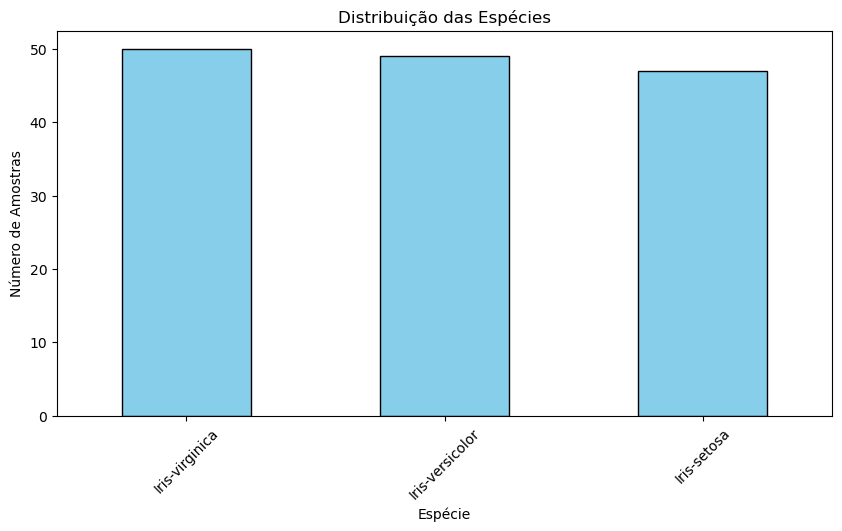

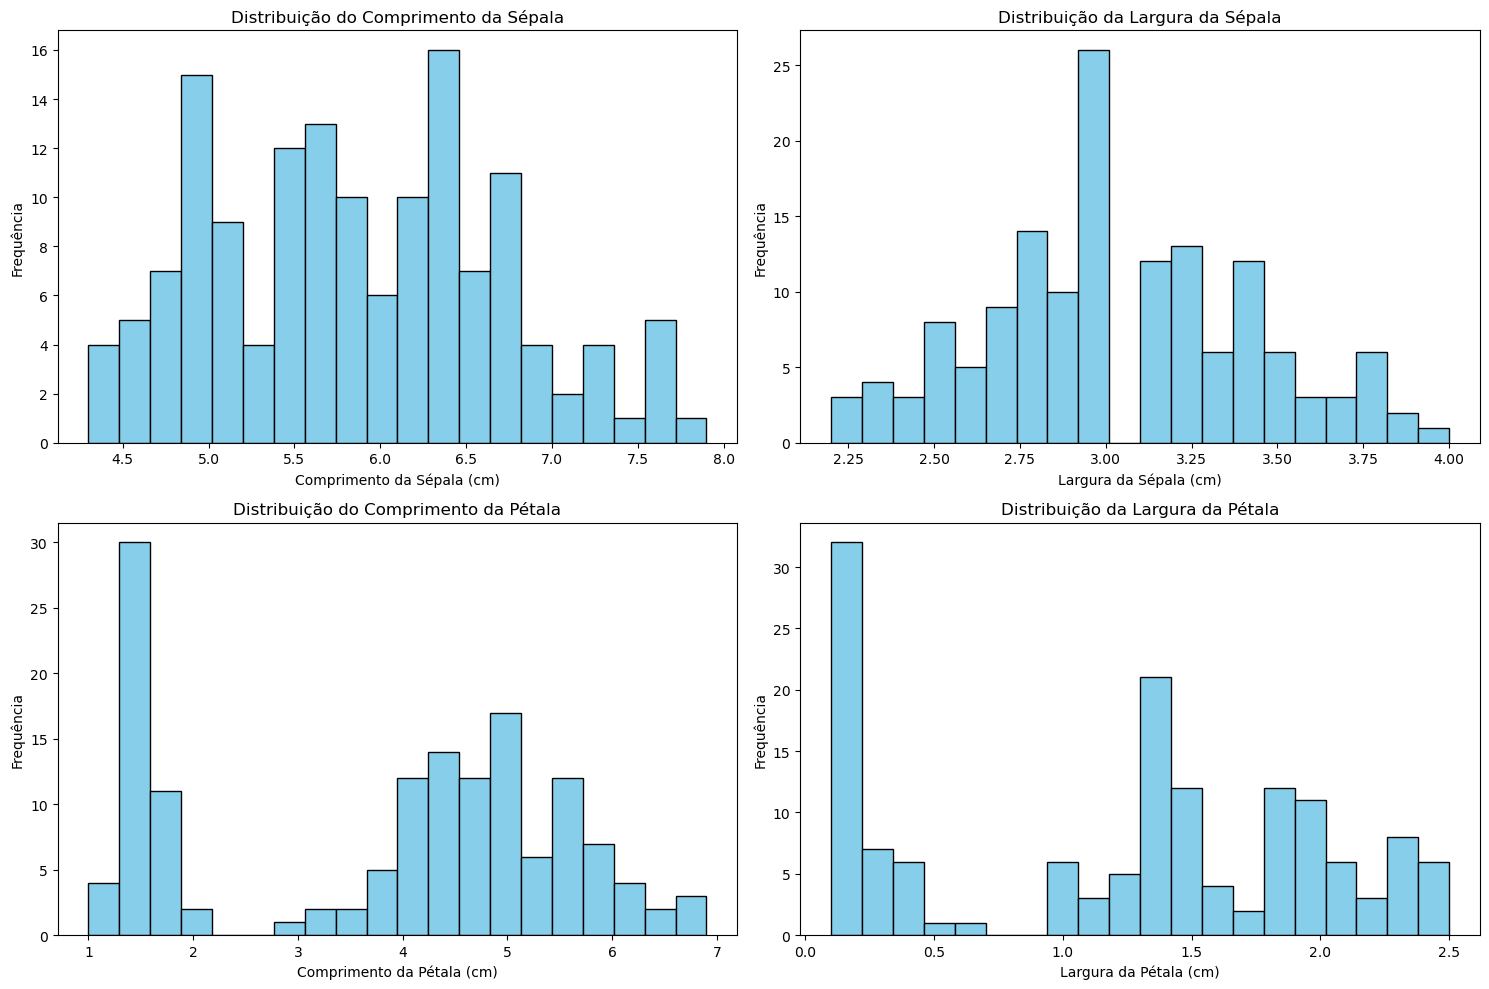

In [7]:
import matplotlib.pyplot as plt

# Gráfico de barras da distribuição das espécies
species_counts = df_clean['Species'].value_counts()
plt.figure(figsize=(10, 5))
species_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribuição das Espécies')
plt.xlabel('Espécie')
plt.ylabel('Número de Amostras')
plt.xticks(rotation=45)
plt.show()

# Histogramas das colunas numéricas
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(df_clean['SepalLengthCm'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição do Comprimento da Sépala')
plt.xlabel('Comprimento da Sépala (cm)')
plt.ylabel('Frequência')

plt.subplot(2, 2, 2)
plt.hist(df_clean['SepalWidthCm'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição da Largura da Sépala')
plt.xlabel('Largura da Sépala (cm)')
plt.ylabel('Frequência')

plt.subplot(2, 2, 3)
plt.hist(df_clean['PetalLengthCm'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição do Comprimento da Pétala')
plt.xlabel('Comprimento da Pétala (cm)')
plt.ylabel('Frequência')

plt.subplot(2, 2, 4)
plt.hist(df_clean['PetalWidthCm'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição da Largura da Pétala')
plt.xlabel('Largura da Pétala (cm)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()
